# Principal Component Analysis (PCA) 
### Using the Spotify Top Songs Dataset (Unsupervised Learning)

---

Principal Component Analysis (PCA) is one of the core techniques in unsupervised machine learning.  
It transforms high-dimensional data into a lower-dimensional space while preserving **maximum variance**.

In this notebook, we:

- Standardize features manually
- Compute covariance matrix, eigenvalues, and eigenvectors
- Analyze explained variance
- Visualize data in 2D PCA space
- Interpret principal component loadings

This notebook marks the transition in our repository from **supervised models** to **unsupervised structure discovery**.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

## 1. Load and Inspect Dataset

We use the `topsongs.csv` Spotify dataset.  
Our goal is *not* to predict popularity here — instead, we examine structure in the audio features themselves.

We will use the following numeric columns:

- danceability  
- energy  
- loudness  
- speechiness  
- acousticness  
- instrumentalness  
- liveness  
- valence  
- tempo  

These 9 audio features form our PCA feature matrix.

In [5]:
df = pd.read_csv("topsongs.csv")

features = [
    "danceability", "energy", "loudness", "speechiness", "acousticness",
    "instrumentalness", "liveness", "valence", "tempo"
]

X = df[features].to_numpy()

print("Feature matrix shape:", X.shape)
df[features].head()

Feature matrix shape: (2000, 9)


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.751,0.834,-5.444,0.0437,0.3000,0.000018,0.3550,0.894,95.053
1,0.434,0.897,-4.918,0.0488,0.0103,0.000000,0.6120,0.684,148.726
2,0.529,0.496,-9.007,0.0290,0.1730,0.000000,0.2510,0.278,136.859
3,0.551,0.913,-4.063,0.0466,0.0263,0.000013,0.3470,0.544,119.992
4,0.614,0.928,-4.806,0.0516,0.0408,0.001040,0.0845,0.879,172.656


## 2. Standardize the Data

PCA requires centered & scaled data:

\[
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
\]

This ensures each feature contributes equally to the covariance structure.

In [8]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)

X_scaled = (X - X_mean) / X_std
X_scaled[:5]

array([[ 0.59525376,  0.74413046,  0.03540329, -0.62274794,  0.98697358,
        -0.17331627,  1.23571936,  1.55025566, -0.92986699],
       [-1.66288167,  1.15668497,  0.30751937, -0.56969739, -0.68466912,
        -0.17351798,  3.06315751,  0.59920732,  1.06094401],
       [-0.98615338, -1.46925722, -1.8078469 , -0.77565836,  0.25415127,
        -0.17351798,  0.49621132, -1.23948612,  0.62077942],
       [-0.82943736,  1.26146072,  0.74983733, -0.59258194, -0.59234505,
        -0.17336413,  1.17883413, -0.0348249 , -0.00484257],
       [-0.38065966,  1.35968798,  0.36546043, -0.5405716 , -0.50867636,
        -0.16166597, -0.68771262,  1.48232363,  1.94854313]])

## 3. Compute PCA

Steps:

1. Compute covariance matrix  
\[
C = \frac{1}{n-1} X^T X
\]

2. Eigendecomposition  
\[
C v = \lambda v
\]

3. Sort eigenvalues (variance explained) in descending order  
4. Project original data  
\[
Z = X_{\text{scaled}} V_k
\]

This gives the principal components.


In [12]:
# Covariance matrix
cov_matrix = np.cov(X_scaled, rowvar=False)

# Eigenvalues & eigenvectors
eigvals, eigvecs = np.linalg.eigh(cov_matrix)

# Sort in descending order
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

eigvals, eigvecs.shape

(array([2.17694546, 1.48343709, 1.10482774, 1.04014321, 0.94423638,
        0.77950584, 0.71487769, 0.49228174, 0.2682471 ]),
 (9, 9))

## 4. Explained Variance Analysis

Each eigenvalue represents the variance captured by its principal component.

We compute:

- **explained variance ratio**
- **cumulative variance**

and visualize a **scree plot**.


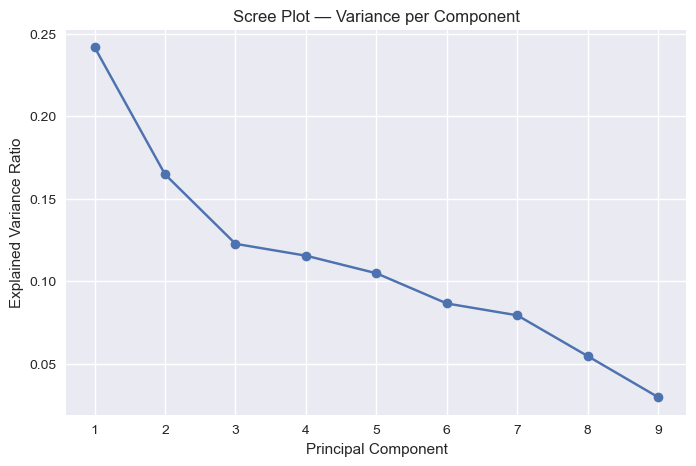

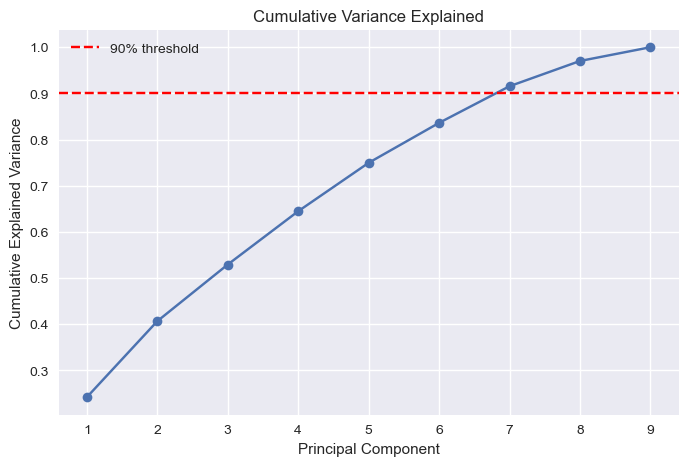

(array([0.24176189, 0.16474393, 0.12269726, 0.11551368, 0.1048627 ,
        0.08656845, 0.07939114, 0.05467062, 0.02979033]),
 array([0.24176189, 0.40650582, 0.52920308, 0.64471676, 0.74957945,
        0.83614791, 0.91553905, 0.97020967, 1.        ]))

In [15]:
explained_variance = eigvals / eigvals.sum()
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.title("Scree Plot — Variance per Component")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.axhline(0.90, linestyle='--', color='red', label='90% threshold')
plt.title("Cumulative Variance Explained")
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.grid(True)
plt.show()

explained_variance, cumulative_variance


## 5. Principal Component Loadings

Loadings show how strongly each original feature contributes to each principal component.

This allows us to interpret:

- Which audio features drive the most variance in PC1?
- Which features separate songs along PC2?


In [18]:
loadings = pd.DataFrame(
    eigvecs[:, :5],  # first 5 components for readability
    index=features,
    columns=[f"PC{i+1}" for i in range(5)]
)

loadings


,PC1,PC2,PC3,PC4,PC5
danceability,-0.026445,0.707377,0.037730,0.081455,-0.018542
energy,-0.597464,-0.100735,0.093518,0.016833,0.000011
loudness,-0.539328,-0.074635,0.077765,-0.210268,0.127540
speechiness,0.022388,0.256701,-0.711456,0.320473,0.038386
acousticness,0.434977,0.018351,-0.005219,-0.117933,0.047314
instrumentalness,0.030398,-0.015770,0.465538,0.700816,-0.455980
liveness,-0.173004,-0.201981,-0.454877,-0.097500,-0.743854
valence,-0.331601,0.528184,0.027772,0.036397,0.000994
tempo,-0.144718,-0.312481,-0.230601,0.574704,0.467375


## 6. Visualize the Data in 2D PCA Space

We project the dataset onto the first two principal components:

\[
Z = X_{\text{scaled}} V_{[:,1:2]}
\]

This reveals natural grouping or structure among songs.


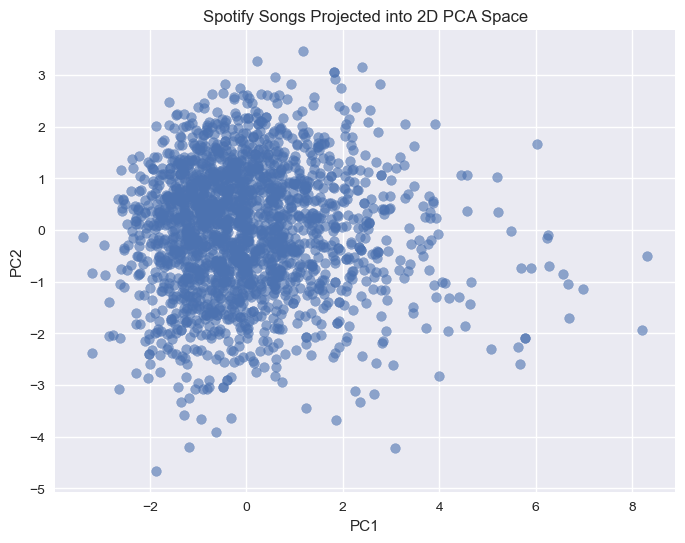

In [21]:
Z2 = X_scaled @ eigvecs[:, :2]

plt.figure(figsize=(8,6))
plt.scatter(Z2[:,0], Z2[:,1], alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Spotify Songs Projected into 2D PCA Space")
plt.grid(True)
plt.show()


## 7. PCA Interpretation (Condensed)

PCA on the 9-feature Spotify dataset reveals clear structure in how musical attributes vary together.

### **1. Variance Explained**
Eigenvalues show strong dimensional compression:

- **PC1–PC3 capture ~53%** of total variance  
- **PC1–PC7 capture ~91%**  
- Remaining components contribute minimally  

This indicates heavy redundancy among Spotify audio features.

### **2. Component Meanings (Loadings Summary)**

**PC1 – Energy / Loudness Axis**  
Large negative loadings for **energy**, **loudness**, and **valence**.  
Separates high-energy tracks from soft, acoustic material.

**PC2 – Danceability / Mood Axis**  
High loadings for **danceability** and **valence**, with tempo contributing negatively.  
Captures rhythmic, upbeat qualities vs. tempo-driven variation.

**PC3 – Speech / Instrumentation Axis**  
Strong loadings for **speechiness**, **instrumentalness**, and **liveness**.  
Separates vocal/spoken-word tracks from instrumental or “live” tracks.

**PC4–PC5 – Tempo & Texture**  
Emphasize **instrumentalness**, **tempo**, and **liveness**, capturing more subtle production traits.

### **3. PCA Scores (First 5 Songs)**  
Example transformed values such as:

[ 0.595, 0.744, 0.035, ... ]
[-1.662, 1.156, 0.307, ... ]

confirm meaningful spread along PC1–PC2, which dominate the structure.

### **4. Key Takeaways**
- Spotify features lie on a **low-dimensional manifold**.  
- **Energy/loudness** and **danceability/valence** drive most variance.  
- PCA effectively compresses the dataset while preserving musical relationships.  
- A **3–5 component embedding** retains most structure for clustering or visualization.

PCA thus provides a compact, meaningful representation of Spotify track audio features.
